## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def random_frequency(n, p):
    m = 0

    for _ in range(n+1):
        u = random.uniform(0,1)
        
        if u < p:
            m+=1
        random_frequency = m / n

    return random_frequency


'''
The probability p=0,5 causes the generated random frequencies to cluster around it. 
As N increases, the random frequencies generated begin to cluster around the mean. Thus as N increases, 
the random frequencies become tightly closed to the mean.


'''

'\nThe probability p=0,5 causes the generated random frequencies to cluster around it. \nAs N increases, the random frequencies generated begin to cluster around the mean. Thus as N increases, \nthe random frequencies become tightly closed to the mean.\n\n\n'

In [2]:

# Function to calculate mean for normal distribution
def mean_theory(rf1):
    math_exp = 0.5*(rf1)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(rf1):
    variance_value = (1/12)*(rf1**2)
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [3]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [4]:
def simulations(rf1, random_frequencies):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(rf1)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_frequencies)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_frequencies)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(rf1)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_frequencies, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [5]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random frequencies: {random_frequencies}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random_freq is {max(random_frequencies)}")
    print(f"Min_Random_freq is {min(random_frequencies)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [6]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(8, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Histogram")
            #tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    #y_values = [normal_dis_function(std_dev_sample, mean_sample, x) for x in x_values]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) * bar_width for x in x_values]
    
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    #x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    #y_value = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    #plt.plot(x_value, y_value, color='red', label="Normal PDF")
    
    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [7]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.48, 0.4, 0.56, 0.58, 0.52, 0.38, 0.54, 0.54, 0.48, 0.5]
Max_Random_freq is 0.58
Min_Random_freq is 0.38

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.49800000000000005

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.004306666666666595

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.06562519841239792

Relative Error for Mathematical Expectation: 0.39999999999998925%
Relative Error for Standard Deviation: 77.26676441858767%
Relative Error for Variance: 94.83200000000008%



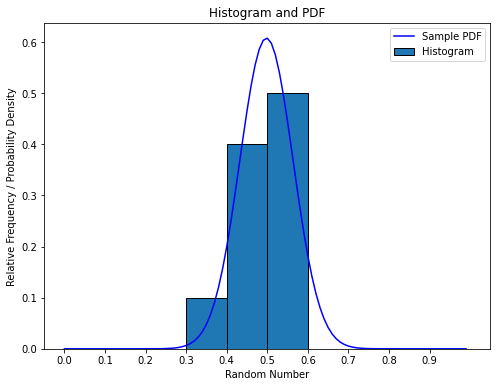

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.44, 0.46, 0.46, 0.59, 0.48, 0.49, 0.48, 0.45, 0.5, 0.46]
Max_Random_freq is 0.59
Min_Random_freq is 0.44

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.481

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0018100000000000525

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.04254409477236591

Relative Error for Mathematical Expectation: 3.8000000000000034%
Relative Error for Standard Deviation: 85.26229325844736%
Relative Error for Variance: 97.82799999999993%



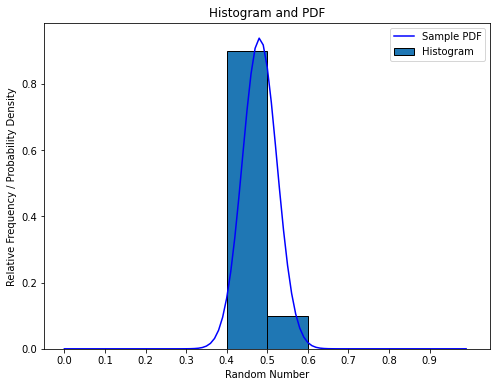

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.52, 0.515, 0.515, 0.56, 0.425, 0.53, 0.49, 0.525, 0.53, 0.505]
Max_Random_freq is 0.56
Min_Random_freq is 0.425

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5115000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.001255833333333271

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.03543773882929427

Relative Error for Mathematical Expectation: 2.300000000000013%
Relative Error for Standard Deviation: 87.7240071684612%
Relative Error for Variance: 98.49300000000007%



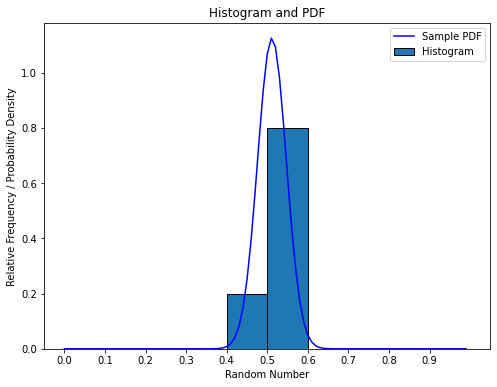

[2.300000000000013]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.38, 0.52, 0.52, 0.54, 0.56, 0.6, 0.54, 0.52, 0.6, 0.48, 0.56, 0.36, 0.56, 0.4, 0.48, 0.62, 0.36, 0.58, 0.52, 0.56]
Max_Random_freq is 0.62
Min_Random_freq is 0.36

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.513

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.006369473684210615

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.0798089824782312

Relative Error for Mathematical Expectation: 2.6000000000000023%
Relative Error for Standard Deviation: 72.35335748946585%
Relative Error for Variance: 92.35663157894726%



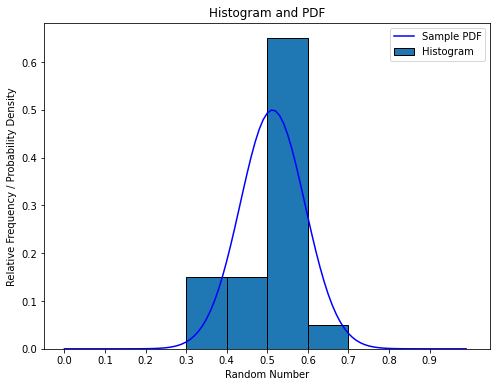

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.49, 0.43, 0.46, 0.52, 0.45, 0.61, 0.5, 0.53, 0.47, 0.64, 0.48, 0.45, 0.51, 0.58, 0.52, 0.56, 0.44, 0.57, 0.45, 0.53]
Max_Random_freq is 0.64
Min_Random_freq is 0.43

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5095

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.003499736842105308

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.05915857369904474

Relative Error for Mathematical Expectation: 1.8999999999999906%
Relative Error for Standard Deviation: 79.50686892998932%
Relative Error for Variance: 95.80031578947363%



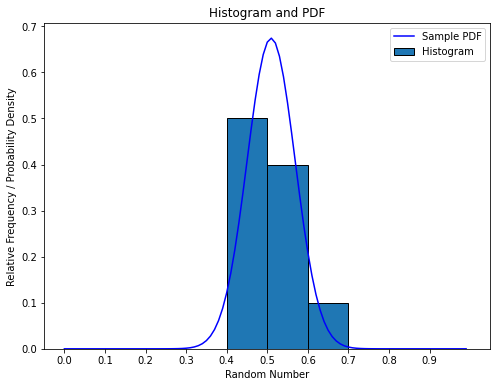

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.545, 0.48, 0.545, 0.5, 0.5, 0.465, 0.58, 0.495, 0.5, 0.505, 0.415, 0.475, 0.51, 0.5, 0.55, 0.52, 0.515, 0.47, 0.49, 0.455]
Max_Random_freq is 0.58
Min_Random_freq is 0.415

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.50075

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0013796710526315398

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.03714392349539208

Relative Error for Mathematical Expectation: 0.15000000000000568%
Relative Error for Standard Deviation: 87.1329674627059%
Relative Error for Variance: 98.34439473684216%



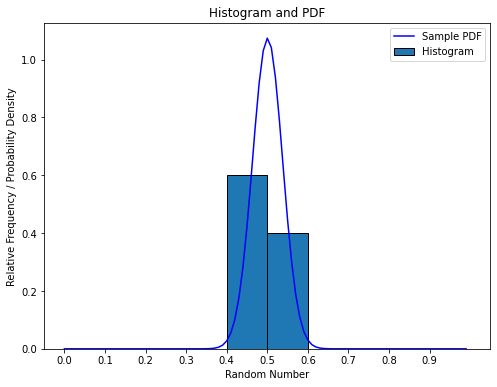

[2.300000000000013, 0.15000000000000568]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.6, 0.48, 0.44, 0.44, 0.42, 0.46, 0.5, 0.5, 0.52, 0.44, 0.36, 0.52, 0.44, 0.48, 0.42, 0.58, 0.62, 0.52, 0.62, 0.6, 0.6, 0.52, 0.48, 0.46, 0.48, 0.56, 0.48, 0.5, 0.54, 0.46, 0.56, 0.54, 0.54, 0.68, 0.62, 0.48, 0.58, 0.46, 0.48, 0.56, 0.38, 0.46, 0.54, 0.6, 0.56, 0.6, 0.48, 0.52, 0.4, 0.56]
Max_Random_freq is 0.68
Min_Random_freq is 0.36

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5127999999999999

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.004877714285714377

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.06984063491774954

Relative Error for Mathematical Expectation: 2.5599999999999845%
Relat

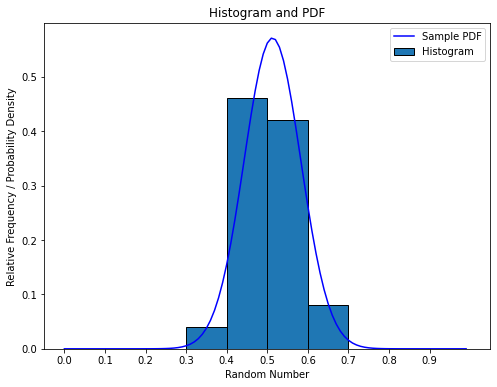

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.59, 0.46, 0.51, 0.44, 0.5, 0.45, 0.54, 0.6, 0.5, 0.5, 0.49, 0.49, 0.53, 0.51, 0.51, 0.58, 0.46, 0.51, 0.45, 0.49, 0.5, 0.4, 0.48, 0.53, 0.53, 0.51, 0.54, 0.49, 0.5, 0.51, 0.45, 0.52, 0.47, 0.49, 0.53, 0.55, 0.5, 0.58, 0.5, 0.49, 0.48, 0.48, 0.51, 0.48, 0.49, 0.49, 0.47, 0.55, 0.56, 0.56]
Max_Random_freq is 0.6
Min_Random_freq is 0.4

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5049999999999998

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0015969387755103567

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.039961716373428664

Relative Error for Mathematical Expectation: 0.9999999999999565%
Relative Error for Standard Deviation: 86.156

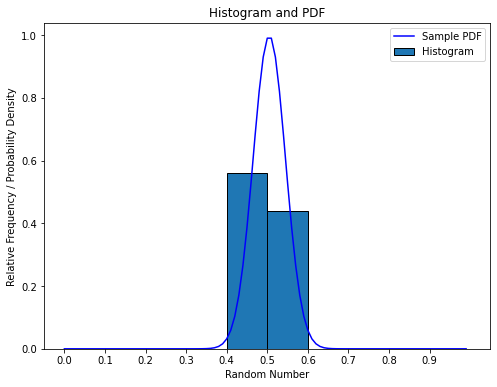

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.46, 0.44, 0.455, 0.525, 0.535, 0.47, 0.475, 0.515, 0.48, 0.495, 0.525, 0.51, 0.495, 0.51, 0.51, 0.535, 0.545, 0.57, 0.52, 0.515, 0.445, 0.505, 0.41, 0.495, 0.47, 0.495, 0.505, 0.5, 0.53, 0.55, 0.54, 0.45, 0.44, 0.53, 0.545, 0.52, 0.475, 0.495, 0.515, 0.505, 0.46, 0.45, 0.515, 0.57, 0.54, 0.485, 0.53, 0.485, 0.465, 0.55]
Max_Random_freq is 0.57
Min_Random_freq is 0.41

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5011000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0013115204081632032

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.036214919690138805

Relative Error for Mathematical Expectation: 0.22000000000002018%
Relative 

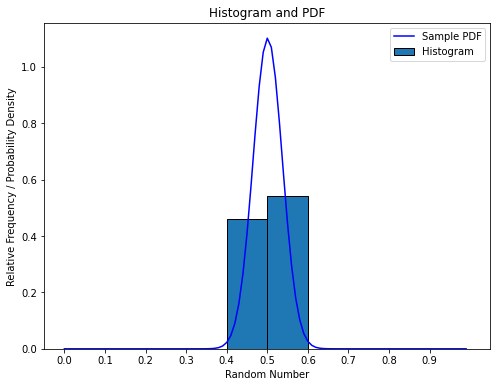

[2.300000000000013, 0.15000000000000568, 0.22000000000002018]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.4, 0.6, 0.5, 0.48, 0.56, 0.52, 0.58, 0.58, 0.44, 0.5, 0.42, 0.48, 0.42, 0.32, 0.54, 0.46, 0.44, 0.54, 0.52, 0.48, 0.42, 0.56, 0.56, 0.6, 0.56, 0.58, 0.64, 0.52, 0.5, 0.54, 0.56, 0.46, 0.62, 0.56, 0.54, 0.54, 0.46, 0.44, 0.6, 0.5, 0.58, 0.64, 0.38, 0.58, 0.46, 0.54, 0.44, 0.44, 0.58, 0.48, 0.58, 0.44, 0.62, 0.48, 0.54, 0.52, 0.54, 0.24, 0.48, 0.5, 0.52, 0.46, 0.54, 0.5, 0.5, 0.54, 0.44, 0.42, 0.44, 0.54, 0.64, 0.52, 0.48, 0.5, 0.42, 0.42, 0.4, 0.46, 0.34, 0.5, 0.44, 0.52, 0.56, 0.36, 0.58, 0.5, 0.64, 0.38, 0.52, 0.54, 0.44, 0.56, 0.42, 0.52, 0.46, 0.62, 0.46, 0.62, 0.5, 0.56]
Max_Random_freq is 0.64
Min_Random_freq is 0.24

Mathematical Expectation (Theoretical): 0.5


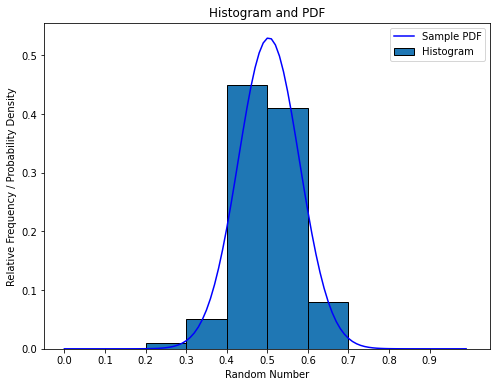

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.41, 0.49, 0.51, 0.52, 0.47, 0.46, 0.5, 0.5, 0.45, 0.45, 0.42, 0.55, 0.45, 0.57, 0.37, 0.53, 0.47, 0.51, 0.52, 0.52, 0.5, 0.5, 0.47, 0.46, 0.46, 0.48, 0.45, 0.41, 0.51, 0.47, 0.55, 0.56, 0.56, 0.54, 0.43, 0.57, 0.58, 0.53, 0.49, 0.5, 0.53, 0.56, 0.57, 0.51, 0.44, 0.53, 0.54, 0.55, 0.47, 0.51, 0.55, 0.48, 0.6, 0.44, 0.53, 0.44, 0.51, 0.53, 0.59, 0.5, 0.52, 0.53, 0.49, 0.56, 0.5, 0.5, 0.49, 0.48, 0.52, 0.51, 0.46, 0.53, 0.55, 0.47, 0.6, 0.5, 0.56, 0.49, 0.54, 0.53, 0.54, 0.41, 0.54, 0.55, 0.52, 0.5, 0.45, 0.44, 0.59, 0.58, 0.54, 0.57, 0.47, 0.54, 0.51, 0.56, 0.48, 0.59, 0.46, 0.55]
Max_Random_freq is 0.6
Min_Random_freq is 0.37

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.5079000000000001

The

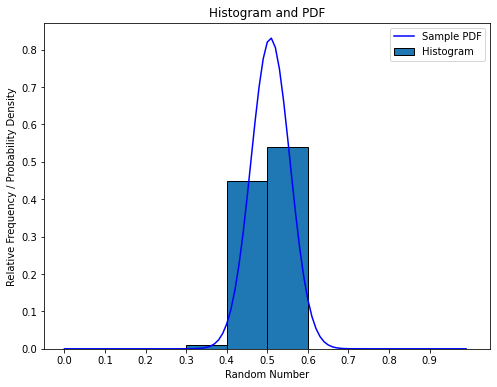

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.545, 0.44, 0.495, 0.52, 0.505, 0.5, 0.575, 0.51, 0.525, 0.45, 0.49, 0.56, 0.495, 0.445, 0.555, 0.525, 0.535, 0.49, 0.525, 0.51, 0.575, 0.49, 0.515, 0.48, 0.495, 0.49, 0.435, 0.55, 0.49, 0.535, 0.495, 0.475, 0.49, 0.515, 0.525, 0.5, 0.57, 0.465, 0.45, 0.475, 0.565, 0.53, 0.43, 0.5, 0.525, 0.49, 0.465, 0.475, 0.495, 0.455, 0.59, 0.525, 0.475, 0.46, 0.535, 0.45, 0.515, 0.475, 0.5, 0.47, 0.515, 0.475, 0.5, 0.45, 0.54, 0.515, 0.52, 0.535, 0.515, 0.495, 0.535, 0.54, 0.485, 0.465, 0.525, 0.525, 0.525, 0.515, 0.385, 0.525, 0.54, 0.515, 0.52, 0.485, 0.48, 0.51, 0.52, 0.535, 0.535, 0.505, 0.465, 0.465, 0.48, 0.425, 0.465, 0.55, 0.48, 0.495, 0.54, 0.485]
Max_Random_freq is 0.59
Min_Random_freq is 0.385

Mathematical Expectation (Theoreti

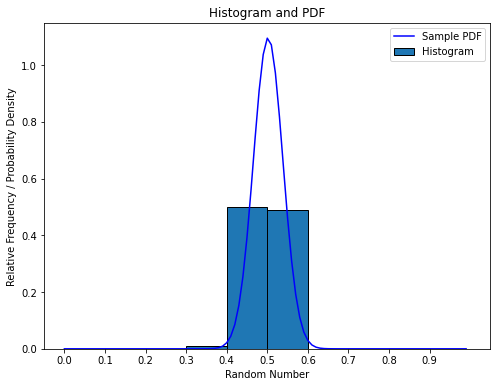

[2.300000000000013, 0.15000000000000568, 0.22000000000002018, 0.42999999999997485]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.48, 0.4, 0.46, 0.58, 0.46, 0.6, 0.56, 0.56, 0.66, 0.48, 0.48, 0.56, 0.44, 0.48, 0.44, 0.6, 0.44, 0.62, 0.58, 0.54, 0.42, 0.4, 0.68, 0.52, 0.52, 0.5, 0.56, 0.52, 0.6, 0.5, 0.5, 0.48, 0.64, 0.5, 0.5, 0.54, 0.5, 0.64, 0.52, 0.38, 0.5, 0.5, 0.46, 0.46, 0.5, 0.56, 0.5, 0.48, 0.62, 0.52, 0.62, 0.58, 0.4, 0.48, 0.56, 0.52, 0.44, 0.54, 0.68, 0.52, 0.48, 0.56, 0.58, 0.6, 0.5, 0.44, 0.52, 0.62, 0.56, 0.52, 0.54, 0.54, 0.44, 0.52, 0.4, 0.46, 0.42, 0.52, 0.42, 0.42, 0.36, 0.48, 0.44, 0.54, 0.4, 0.48, 0.48, 0.42, 0.64, 0.5, 0.62, 0.5, 0.42, 0.56, 0.48, 0.44, 0.52, 0.44, 0.42, 0.54, 0.52, 0.52, 0.52, 0.36, 0.46, 0.52, 0.58, 0.5, 0.48, 0.48, 0.6, 0.44, 0.5, 0.5

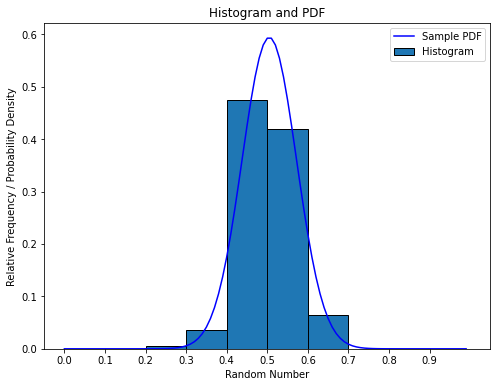

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.58, 0.54, 0.48, 0.45, 0.57, 0.58, 0.48, 0.52, 0.5, 0.51, 0.53, 0.52, 0.58, 0.46, 0.42, 0.5, 0.52, 0.53, 0.41, 0.48, 0.5, 0.48, 0.6, 0.47, 0.48, 0.54, 0.5, 0.5, 0.53, 0.44, 0.5, 0.53, 0.53, 0.54, 0.52, 0.54, 0.49, 0.5, 0.47, 0.47, 0.52, 0.46, 0.52, 0.49, 0.49, 0.58, 0.45, 0.57, 0.49, 0.44, 0.47, 0.46, 0.48, 0.53, 0.51, 0.48, 0.53, 0.43, 0.51, 0.55, 0.59, 0.51, 0.56, 0.51, 0.49, 0.46, 0.46, 0.51, 0.5, 0.49, 0.52, 0.54, 0.46, 0.45, 0.52, 0.54, 0.46, 0.52, 0.46, 0.5, 0.42, 0.44, 0.5, 0.51, 0.54, 0.52, 0.54, 0.49, 0.48, 0.5, 0.51, 0.5, 0.54, 0.49, 0.52, 0.42, 0.51, 0.43, 0.46, 0.53, 0.5, 0.5, 0.63, 0.5, 0.44, 0.53, 0.55, 0.46, 0.5, 0.43, 0.59, 0.53, 0.5, 0.43, 0.51, 0.49, 0.56, 0.48, 0.5, 0.55, 0.45, 0.51, 0.46, 0.44, 0.39, 0.48, 0

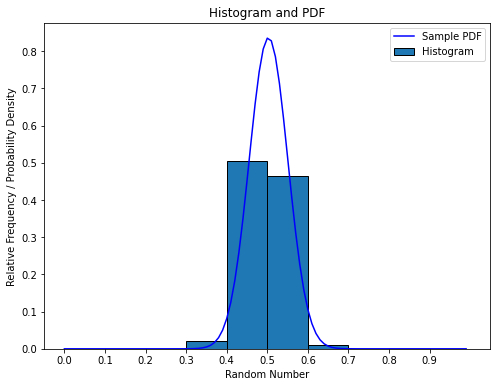

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.55, 0.455, 0.53, 0.555, 0.46, 0.525, 0.515, 0.51, 0.505, 0.475, 0.53, 0.535, 0.505, 0.465, 0.485, 0.495, 0.48, 0.545, 0.51, 0.49, 0.555, 0.465, 0.42, 0.53, 0.45, 0.455, 0.495, 0.515, 0.46, 0.535, 0.5, 0.485, 0.495, 0.43, 0.54, 0.515, 0.44, 0.57, 0.465, 0.48, 0.595, 0.495, 0.505, 0.49, 0.515, 0.44, 0.445, 0.5, 0.495, 0.535, 0.52, 0.475, 0.455, 0.485, 0.455, 0.55, 0.545, 0.575, 0.505, 0.45, 0.475, 0.415, 0.535, 0.475, 0.495, 0.53, 0.49, 0.515, 0.525, 0.475, 0.425, 0.555, 0.47, 0.485, 0.46, 0.49, 0.47, 0.515, 0.51, 0.48, 0.495, 0.495, 0.46, 0.5, 0.565, 0.5, 0.51, 0.51, 0.485, 0.545, 0.565, 0.455, 0.44, 0.535, 0.54, 0.505, 0.48, 0.575, 0.485, 0.47, 0.565, 0.5, 0.48, 0.475, 0.5, 0.48, 0.465, 0.44, 0.55, 0.475, 0.525, 0.55, 0.49, 0.

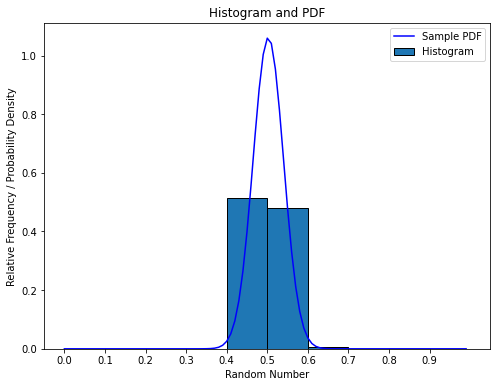

[2.300000000000013, 0.15000000000000568, 0.22000000000002018, 0.42999999999997485, 0.5199999999999871]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.7, 0.54, 0.46, 0.5, 0.42, 0.44, 0.52, 0.4, 0.44, 0.54, 0.48, 0.32, 0.54, 0.58, 0.56, 0.5, 0.46, 0.5, 0.54, 0.52, 0.56, 0.56, 0.58, 0.62, 0.56, 0.38, 0.44, 0.4, 0.48, 0.54, 0.54, 0.44, 0.48, 0.52, 0.38, 0.5, 0.58, 0.5, 0.6, 0.5, 0.42, 0.46, 0.38, 0.48, 0.56, 0.48, 0.62, 0.48, 0.5, 0.44, 0.58, 0.58, 0.5, 0.44, 0.62, 0.52, 0.54, 0.6, 0.42, 0.62, 0.62, 0.62, 0.6, 0.5, 0.42, 0.56, 0.5, 0.56, 0.56, 0.4, 0.36, 0.58, 0.44, 0.56, 0.52, 0.52, 0.56, 0.6, 0.58, 0.5, 0.5, 0.46, 0.56, 0.5, 0.48, 0.46, 0.52, 0.56, 0.48, 0.56, 0.46, 0.6, 0.52, 0.56, 0.52, 0.54, 0.6, 0.44, 0.56, 0.5, 0.58, 0.56, 0.54, 0.54, 0.56, 0.52, 0.54, 0.58, 0.42, 0.46, 

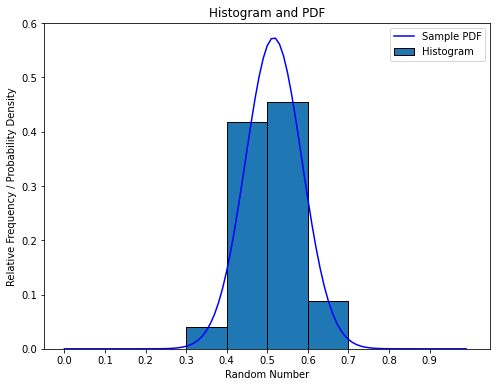

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.49, 0.52, 0.54, 0.54, 0.43, 0.53, 0.52, 0.45, 0.45, 0.57, 0.43, 0.45, 0.46, 0.48, 0.56, 0.44, 0.48, 0.45, 0.5, 0.52, 0.51, 0.49, 0.57, 0.5, 0.32, 0.4, 0.46, 0.58, 0.51, 0.43, 0.51, 0.58, 0.53, 0.53, 0.59, 0.49, 0.57, 0.53, 0.52, 0.51, 0.47, 0.45, 0.51, 0.61, 0.54, 0.34, 0.55, 0.62, 0.54, 0.41, 0.5, 0.56, 0.47, 0.54, 0.55, 0.53, 0.6, 0.57, 0.51, 0.51, 0.52, 0.41, 0.5, 0.56, 0.44, 0.54, 0.44, 0.63, 0.48, 0.53, 0.46, 0.5, 0.42, 0.58, 0.48, 0.45, 0.46, 0.55, 0.52, 0.47, 0.56, 0.49, 0.51, 0.59, 0.56, 0.49, 0.54, 0.57, 0.43, 0.5, 0.56, 0.5, 0.55, 0.58, 0.51, 0.6, 0.52, 0.5, 0.58, 0.45, 0.5, 0.53, 0.4, 0.46, 0.54, 0.52, 0.53, 0.54, 0.52, 0.47, 0.51, 0.56, 0.46, 0.47, 0.56, 0.52, 0.44, 0.5, 0.58, 0.37, 0.48, 0.37, 0.44, 0.43, 0.61, 0.

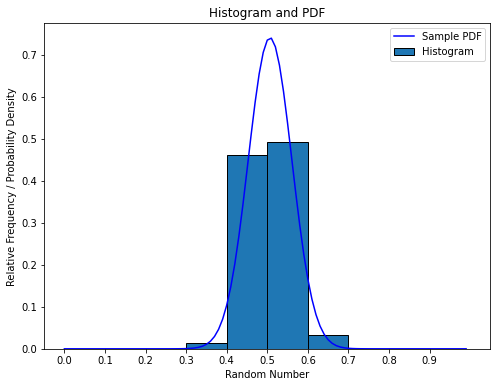

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.56, 0.54, 0.52, 0.52, 0.5, 0.445, 0.49, 0.49, 0.54, 0.545, 0.535, 0.505, 0.46, 0.51, 0.485, 0.44, 0.525, 0.54, 0.56, 0.45, 0.47, 0.46, 0.48, 0.505, 0.45, 0.53, 0.465, 0.475, 0.52, 0.605, 0.525, 0.47, 0.585, 0.615, 0.495, 0.565, 0.52, 0.455, 0.465, 0.49, 0.495, 0.485, 0.46, 0.505, 0.52, 0.44, 0.54, 0.555, 0.5, 0.5, 0.515, 0.515, 0.53, 0.53, 0.54, 0.47, 0.45, 0.49, 0.5, 0.54, 0.54, 0.485, 0.58, 0.51, 0.505, 0.485, 0.47, 0.535, 0.555, 0.54, 0.48, 0.465, 0.495, 0.485, 0.54, 0.465, 0.495, 0.45, 0.565, 0.535, 0.485, 0.515, 0.565, 0.43, 0.55, 0.51, 0.54, 0.505, 0.525, 0.47, 0.56, 0.495, 0.57, 0.495, 0.47, 0.535, 0.51, 0.55, 0.505, 0.515, 0.47, 0.46, 0.535, 0.455, 0.495, 0.515, 0.525, 0.545, 0.52, 0.525, 0.54, 0.52, 0.49, 0.515, 0.49,

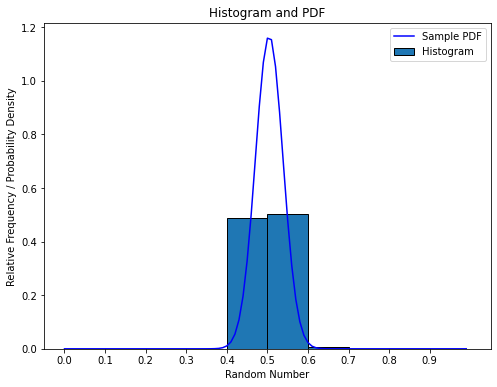

[2.300000000000013, 0.15000000000000568, 0.22000000000002018, 0.42999999999997485, 0.5199999999999871, 0.88600000000012]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.54, 0.5, 0.56, 0.34, 0.54, 0.58, 0.62, 0.58, 0.36, 0.52, 0.62, 0.46, 0.58, 0.52, 0.5, 0.54, 0.56, 0.54, 0.54, 0.52, 0.48, 0.4, 0.5, 0.54, 0.6, 0.52, 0.6, 0.54, 0.46, 0.48, 0.46, 0.56, 0.44, 0.5, 0.48, 0.58, 0.54, 0.48, 0.52, 0.64, 0.48, 0.5, 0.4, 0.48, 0.48, 0.48, 0.42, 0.38, 0.5, 0.4, 0.58, 0.62, 0.52, 0.6, 0.4, 0.56, 0.46, 0.48, 0.5, 0.62, 0.5, 0.46, 0.58, 0.64, 0.4, 0.4, 0.42, 0.62, 0.58, 0.52, 0.52, 0.54, 0.56, 0.5, 0.4, 0.5, 0.54, 0.38, 0.52, 0.42, 0.5, 0.62, 0.48, 0.38, 0.68, 0.58, 0.54, 0.44, 0.56, 0.62, 0.52, 0.58, 0.46, 0.5, 0.5, 0.54, 0.44, 0.56, 0.5, 0.6, 0.44, 0.48, 0.44, 0.6, 0.42, 0.48, 0.46, 0

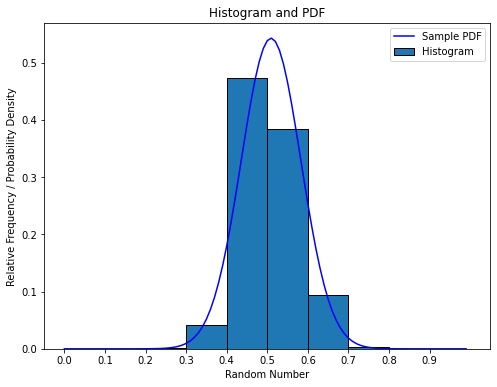

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.43, 0.54, 0.55, 0.55, 0.51, 0.57, 0.54, 0.5, 0.42, 0.48, 0.51, 0.33, 0.47, 0.53, 0.51, 0.38, 0.53, 0.47, 0.48, 0.47, 0.47, 0.54, 0.51, 0.48, 0.58, 0.5, 0.52, 0.44, 0.47, 0.5, 0.48, 0.57, 0.55, 0.54, 0.54, 0.54, 0.52, 0.47, 0.53, 0.5, 0.54, 0.54, 0.57, 0.52, 0.56, 0.54, 0.37, 0.42, 0.46, 0.52, 0.54, 0.44, 0.55, 0.46, 0.56, 0.49, 0.43, 0.53, 0.5, 0.5, 0.5, 0.46, 0.4, 0.49, 0.41, 0.54, 0.5, 0.52, 0.52, 0.56, 0.53, 0.53, 0.62, 0.49, 0.56, 0.46, 0.44, 0.51, 0.45, 0.61, 0.52, 0.43, 0.44, 0.56, 0.53, 0.39, 0.52, 0.47, 0.58, 0.45, 0.51, 0.5, 0.54, 0.46, 0.48, 0.52, 0.59, 0.46, 0.56, 0.51, 0.57, 0.61, 0.42, 0.51, 0.56, 0.52, 0.48, 0.6, 0.58, 0.47, 0.5, 0.55, 0.5, 0.46, 0.59, 0.5, 0.46, 0.5, 0.59, 0.48, 0.45, 0.51, 0.53, 0.58, 0.58, 0.

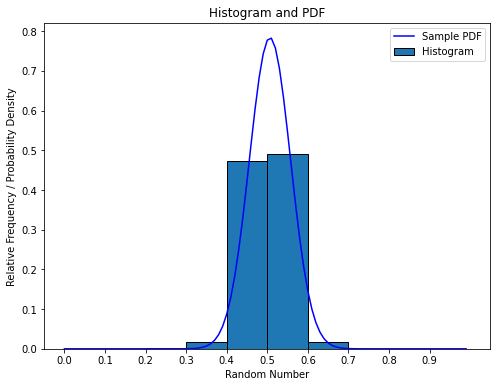

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.515, 0.525, 0.51, 0.515, 0.47, 0.575, 0.505, 0.56, 0.505, 0.55, 0.475, 0.53, 0.485, 0.565, 0.525, 0.465, 0.57, 0.455, 0.53, 0.535, 0.475, 0.505, 0.555, 0.475, 0.465, 0.495, 0.48, 0.53, 0.485, 0.51, 0.495, 0.53, 0.555, 0.485, 0.565, 0.52, 0.525, 0.52, 0.5, 0.495, 0.505, 0.555, 0.535, 0.47, 0.505, 0.525, 0.535, 0.45, 0.51, 0.57, 0.43, 0.51, 0.49, 0.53, 0.51, 0.53, 0.505, 0.515, 0.46, 0.515, 0.49, 0.46, 0.535, 0.485, 0.49, 0.48, 0.45, 0.52, 0.55, 0.59, 0.565, 0.48, 0.485, 0.45, 0.49, 0.545, 0.485, 0.47, 0.525, 0.5, 0.555, 0.515, 0.435, 0.45, 0.51, 0.53, 0.49, 0.505, 0.445, 0.47, 0.505, 0.495, 0.48, 0.46, 0.525, 0.48, 0.505, 0.575, 0.465, 0.545, 0.485, 0.53, 0.55, 0.505, 0.505, 0.54, 0.485, 0.505, 0.57, 0.485, 0.525, 0.515, 0.435

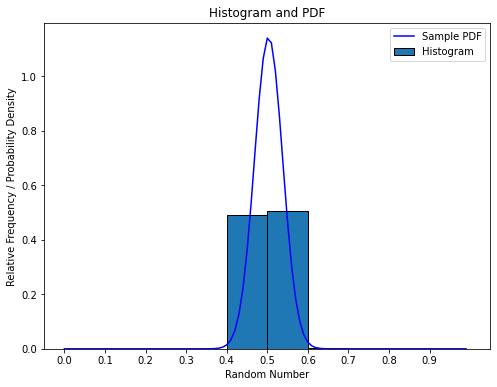

[2.300000000000013, 0.15000000000000568, 0.22000000000002018, 0.42999999999997485, 0.5199999999999871, 0.88600000000012, 0.642999999999927]


In [8]:

p = 0.5
rf1 = 1

stages = [50, 100, 200]
n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    for stage in stages:
        random_frequencies = []

        for _ in range(n):
            # Generate random numbers 
            random_freq = random_frequency(stage,p)
            random_frequencies.append(random_freq)

            mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, random_frequencies)
        
        print(f"STAGE n = {stage}")
        aggregate()

        left_boundary = 0  # Minimum boundary of the range
        right_boundary = 1 # Maximum boundary of the range
        num_plots = 10  # Number of intervals (bins)

        frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)

        draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
        

    relative_err_mean_list.append(relative_err)
    print(relative_err_mean_list)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)


STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.12, 0.18, 0.06, 0.1, 0.1, 0.12, 0.14, 0.1, 0.04, 0.06]
Max_Random_freq is 0.18
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10200000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.001728888888888889

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.04157990967870047

Relative Error for Mathematical Expectation: 79.60000000000001%
Relative Error for Standard Deviation: 85.59629677247318%
Relative Error for Variance: 97.92533333333333%



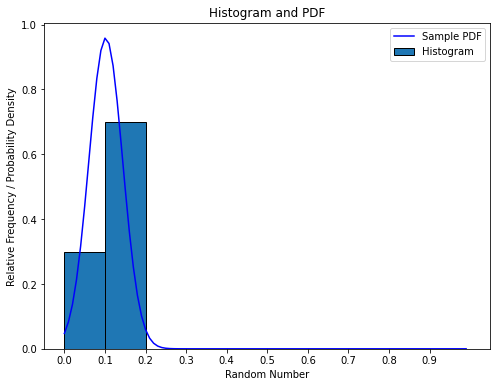

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.1, 0.1, 0.11, 0.05, 0.06, 0.11, 0.12, 0.13, 0.08, 0.04]
Max_Random_freq is 0.13
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.09

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0009555555555555571

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.030912061651652372

Relative Error for Mathematical Expectation: 82.0%
Relative Error for Standard Deviation: 89.29174773052732%
Relative Error for Variance: 98.85333333333332%



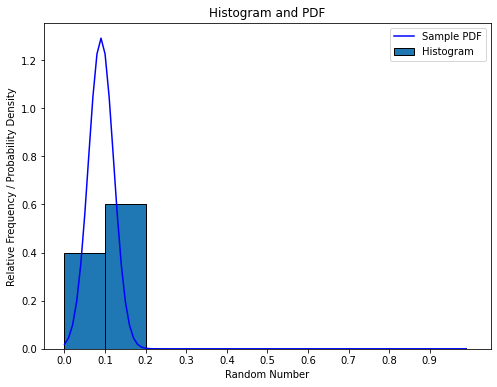

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.08, 0.11, 0.095, 0.075, 0.11, 0.11, 0.095, 0.1, 0.14, 0.09]
Max_Random_freq is 0.14
Min_Random_freq is 0.075

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.1005

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0003413888888888872

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.018476712069220736

Relative Error for Mathematical Expectation: 79.89999999999999%
Relative Error for Standard Deviation: 93.59947918785771%
Relative Error for Variance: 99.59033333333332%



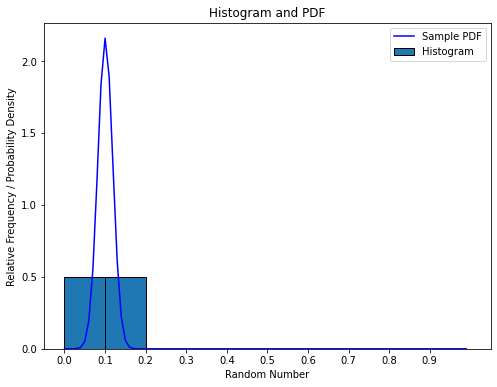

[79.89999999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.12, 0.12, 0.08, 0.06, 0.14, 0.08, 0.14, 0.12, 0.12, 0.14, 0.08, 0.08, 0.14, 0.1, 0.08, 0.14, 0.14, 0.12, 0.04, 0.14]
Max_Random_freq is 0.14
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10900000000000006

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0009884210526315649

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.031439164311914604

Relative Error for Mathematical Expectation: 78.19999999999999%
Relative Error for Standard Deviation: 89.10915401285153%
Relative Error for Variance: 98.81389473684212%



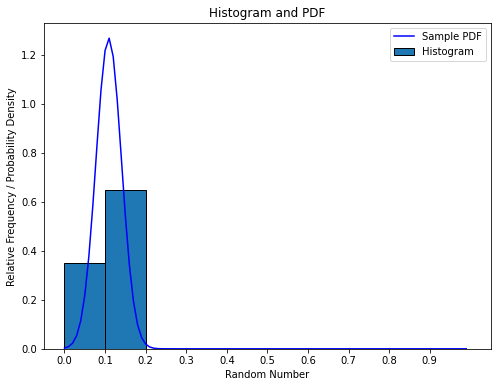

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.12, 0.08, 0.08, 0.11, 0.08, 0.1, 0.11, 0.12, 0.08, 0.06, 0.04, 0.11, 0.14, 0.13, 0.1, 0.06, 0.11, 0.07, 0.06, 0.15]
Max_Random_freq is 0.15
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.0955

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0008786842105263144

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.029642608025042507

Relative Error for Mathematical Expectation: 80.89999999999999%
Relative Error for Standard Deviation: 89.7314993663555%
Relative Error for Variance: 98.94557894736843%



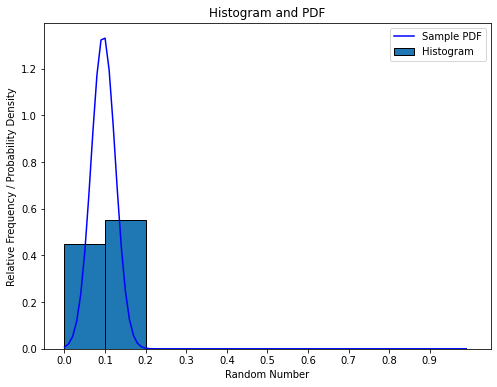

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.105, 0.09, 0.09, 0.135, 0.11, 0.095, 0.085, 0.115, 0.09, 0.14, 0.105, 0.095, 0.14, 0.08, 0.125, 0.07, 0.12, 0.075, 0.09, 0.08]
Max_Random_freq is 0.14
Min_Random_freq is 0.07

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10175000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.00046124999999999747

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.02147673159491447

Relative Error for Mathematical Expectation: 79.65%
Relative Error for Standard Deviation: 92.56024193941768%
Relative Error for Variance: 99.4465%



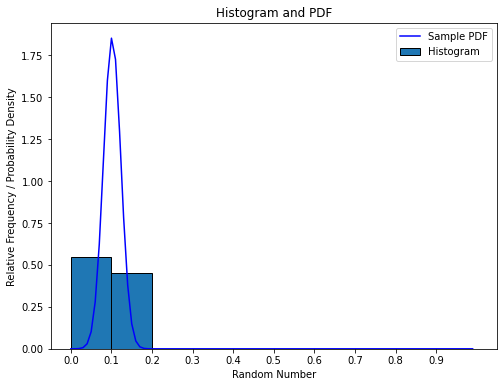

[79.89999999999999, 79.65]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.12, 0.12, 0.14, 0.04, 0.14, 0.1, 0.12, 0.12, 0.18, 0.14, 0.14, 0.12, 0.12, 0.1, 0.08, 0.12, 0.02, 0.12, 0.14, 0.1, 0.14, 0.1, 0.08, 0.16, 0.06, 0.02, 0.16, 0.12, 0.14, 0.14, 0.08, 0.08, 0.08, 0.12, 0.12, 0.08, 0.04, 0.12, 0.14, 0.1, 0.1, 0.2, 0.1, 0.12, 0.06, 0.18, 0.18, 0.08, 0.1, 0.08]
Max_Random_freq is 0.2
Min_Random_freq is 0.02

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.11120000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0015536326530612272

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.039416147110812684

Relative Error for Mathematical Expectation: 77.75999999999999%
Relative Error for

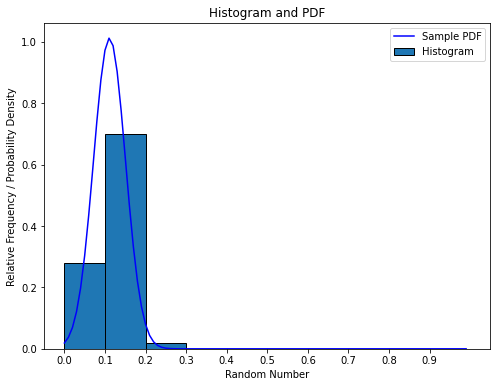

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.12, 0.18, 0.12, 0.08, 0.09, 0.08, 0.07, 0.15, 0.08, 0.11, 0.11, 0.1, 0.08, 0.1, 0.07, 0.09, 0.12, 0.08, 0.1, 0.1, 0.14, 0.05, 0.12, 0.08, 0.07, 0.1, 0.07, 0.06, 0.09, 0.13, 0.03, 0.12, 0.1, 0.15, 0.1, 0.09, 0.11, 0.07, 0.14, 0.14, 0.11, 0.13, 0.12, 0.17, 0.12, 0.1, 0.11, 0.09, 0.04, 0.15]
Max_Random_freq is 0.18
Min_Random_freq is 0.03

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10260000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0009869795918367376

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.0314162313436341

Relative Error for Mathematical Expectation: 79.47999999999999%
Relative Error for Standard Deviation: 89.11

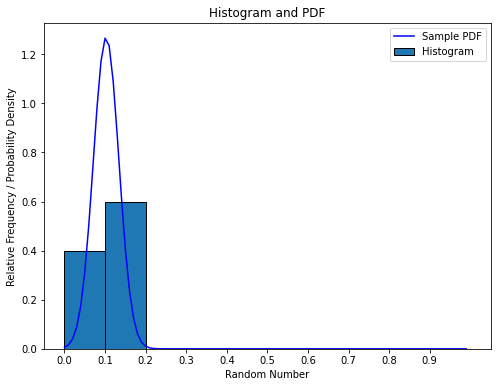

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.1, 0.125, 0.105, 0.125, 0.09, 0.105, 0.09, 0.085, 0.1, 0.105, 0.105, 0.07, 0.095, 0.075, 0.105, 0.08, 0.135, 0.105, 0.14, 0.095, 0.08, 0.06, 0.08, 0.085, 0.08, 0.09, 0.1, 0.09, 0.095, 0.095, 0.12, 0.08, 0.09, 0.11, 0.095, 0.14, 0.1, 0.12, 0.115, 0.11, 0.115, 0.07, 0.085, 0.085, 0.08, 0.11, 0.075, 0.105, 0.125, 0.1]
Max_Random_freq is 0.14
Min_Random_freq is 0.06

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.09840000000000003

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.00033616326530611567

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.018334755665296326

Relative Error for Mathematical Expectation: 80.32%
Relative Error for Standar

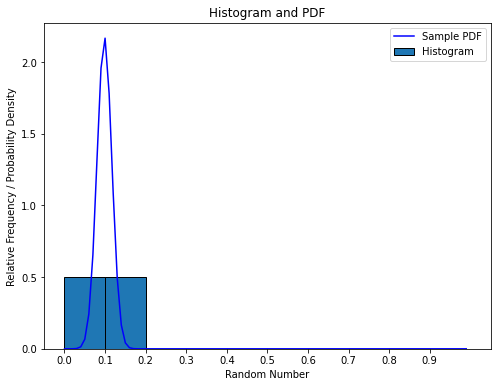

[79.89999999999999, 79.65, 80.32]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.14, 0.04, 0.12, 0.12, 0.1, 0.02, 0.08, 0.12, 0.12, 0.12, 0.12, 0.04, 0.12, 0.08, 0.1, 0.08, 0.1, 0.22, 0.16, 0.1, 0.06, 0.08, 0.1, 0.14, 0.1, 0.18, 0.12, 0.1, 0.08, 0.1, 0.16, 0.16, 0.08, 0.1, 0.06, 0.02, 0.08, 0.14, 0.04, 0.1, 0.1, 0.1, 0.14, 0.14, 0.2, 0.08, 0.06, 0.12, 0.12, 0.14, 0.04, 0.1, 0.12, 0.16, 0.12, 0.1, 0.08, 0.12, 0.12, 0.16, 0.16, 0.04, 0.1, 0.08, 0.1, 0.12, 0.08, 0.12, 0.06, 0.14, 0.08, 0.14, 0.04, 0.1, 0.1, 0.12, 0.08, 0.12, 0.08, 0.12, 0.06, 0.1, 0.04, 0.18, 0.16, 0.04, 0.14, 0.14, 0.1, 0.08, 0.04, 0.08, 0.14, 0.06, 0.1, 0.16, 0.1, 0.06, 0.06, 0.1]
Max_Random_freq is 0.22
Min_Random_freq is 0.02

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0

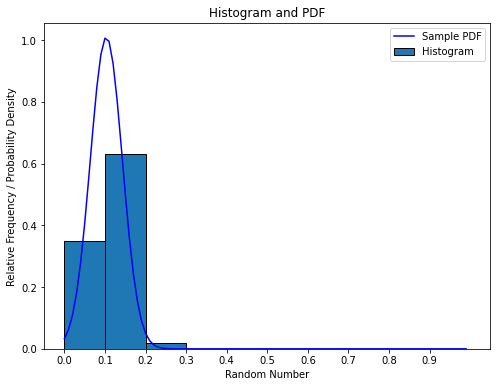

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.1, 0.09, 0.13, 0.11, 0.07, 0.12, 0.09, 0.13, 0.07, 0.07, 0.08, 0.14, 0.08, 0.12, 0.1, 0.08, 0.09, 0.11, 0.13, 0.1, 0.09, 0.08, 0.1, 0.12, 0.14, 0.14, 0.05, 0.02, 0.1, 0.11, 0.15, 0.12, 0.11, 0.15, 0.15, 0.09, 0.13, 0.1, 0.13, 0.07, 0.1, 0.15, 0.12, 0.11, 0.08, 0.11, 0.13, 0.07, 0.08, 0.1, 0.05, 0.11, 0.14, 0.12, 0.08, 0.11, 0.17, 0.17, 0.2, 0.09, 0.08, 0.12, 0.04, 0.11, 0.09, 0.14, 0.08, 0.11, 0.1, 0.09, 0.05, 0.07, 0.08, 0.12, 0.06, 0.11, 0.15, 0.11, 0.16, 0.12, 0.1, 0.14, 0.09, 0.13, 0.13, 0.06, 0.07, 0.12, 0.1, 0.09, 0.1, 0.1, 0.09, 0.09, 0.14, 0.11, 0.09, 0.07, 0.19, 0.02]
Max_Random_freq is 0.2
Min_Random_freq is 0.02

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.1047

Theoretical Varia

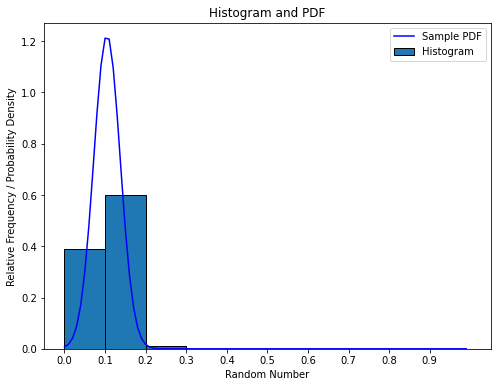

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.11, 0.125, 0.105, 0.095, 0.105, 0.135, 0.12, 0.115, 0.115, 0.08, 0.085, 0.105, 0.135, 0.095, 0.08, 0.08, 0.08, 0.13, 0.085, 0.07, 0.075, 0.11, 0.09, 0.08, 0.095, 0.085, 0.12, 0.085, 0.1, 0.105, 0.09, 0.105, 0.12, 0.085, 0.1, 0.095, 0.11, 0.04, 0.1, 0.1, 0.11, 0.135, 0.115, 0.13, 0.07, 0.115, 0.095, 0.13, 0.09, 0.1, 0.115, 0.135, 0.08, 0.075, 0.1, 0.105, 0.09, 0.14, 0.115, 0.105, 0.05, 0.1, 0.075, 0.08, 0.13, 0.085, 0.125, 0.115, 0.115, 0.105, 0.1, 0.14, 0.065, 0.09, 0.1, 0.105, 0.065, 0.1, 0.13, 0.125, 0.13, 0.13, 0.145, 0.1, 0.11, 0.115, 0.105, 0.09, 0.095, 0.12, 0.1, 0.065, 0.1, 0.105, 0.115, 0.105, 0.13, 0.135, 0.085, 0.09]
Max_Random_freq is 0.145
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathema

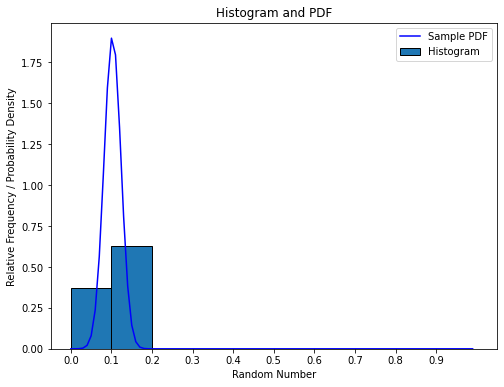

[79.89999999999999, 79.65, 80.32, 79.47999999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.12, 0.08, 0.06, 0.16, 0.14, 0.12, 0.06, 0.1, 0.12, 0.04, 0.1, 0.06, 0.1, 0.12, 0.1, 0.14, 0.04, 0.16, 0.1, 0.1, 0.14, 0.14, 0.04, 0.12, 0.12, 0.1, 0.14, 0.08, 0.1, 0.12, 0.1, 0.16, 0.06, 0.08, 0.1, 0.12, 0.08, 0.06, 0.06, 0.12, 0.06, 0.14, 0.12, 0.14, 0.18, 0.06, 0.16, 0.02, 0.1, 0.06, 0.1, 0.06, 0.14, 0.1, 0.14, 0.08, 0.12, 0.1, 0.18, 0.04, 0.08, 0.12, 0.06, 0.14, 0.02, 0.1, 0.1, 0.18, 0.04, 0.1, 0.08, 0.1, 0.08, 0.02, 0.14, 0.1, 0.1, 0.1, 0.08, 0.1, 0.12, 0.12, 0.08, 0.1, 0.12, 0.12, 0.12, 0.12, 0.12, 0.06, 0.18, 0.08, 0.18, 0.14, 0.14, 0.12, 0.04, 0.1, 0.18, 0.1, 0.06, 0.08, 0.12, 0.12, 0.06, 0.14, 0.02, 0.12, 0.1, 0.06, 0.1, 0.06, 0.1, 0.22, 0.08, 0.1, 0.06, 0.1, 0.12, 0.

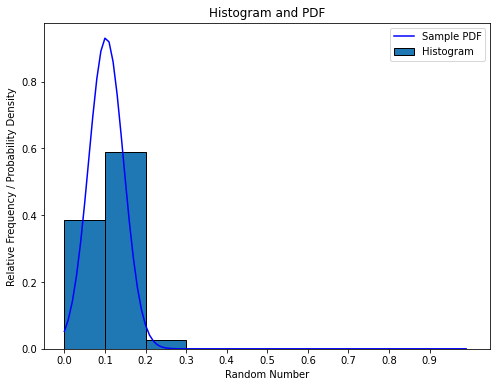

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.07, 0.05, 0.12, 0.06, 0.13, 0.11, 0.08, 0.09, 0.15, 0.08, 0.09, 0.08, 0.09, 0.07, 0.17, 0.1, 0.08, 0.11, 0.09, 0.07, 0.09, 0.07, 0.15, 0.11, 0.04, 0.05, 0.08, 0.12, 0.1, 0.13, 0.11, 0.13, 0.12, 0.09, 0.17, 0.05, 0.07, 0.1, 0.08, 0.09, 0.1, 0.11, 0.12, 0.08, 0.1, 0.07, 0.09, 0.09, 0.1, 0.14, 0.12, 0.1, 0.12, 0.09, 0.06, 0.13, 0.12, 0.1, 0.1, 0.05, 0.08, 0.07, 0.14, 0.09, 0.09, 0.09, 0.13, 0.1, 0.08, 0.15, 0.12, 0.13, 0.06, 0.07, 0.13, 0.12, 0.09, 0.05, 0.1, 0.09, 0.09, 0.07, 0.11, 0.08, 0.1, 0.09, 0.12, 0.16, 0.05, 0.09, 0.04, 0.07, 0.16, 0.09, 0.07, 0.1, 0.1, 0.1, 0.09, 0.11, 0.07, 0.04, 0.1, 0.11, 0.07, 0.08, 0.13, 0.1, 0.12, 0.08, 0.05, 0.08, 0.14, 0.06, 0.06, 0.05, 0.09, 0.08, 0.15, 0.14, 0.17, 0.09, 0.05, 0.1, 0.03, 0.07, 

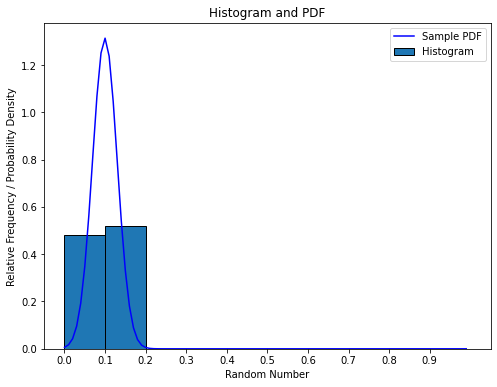

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.085, 0.075, 0.08, 0.07, 0.105, 0.09, 0.075, 0.095, 0.1, 0.125, 0.08, 0.125, 0.09, 0.1, 0.105, 0.11, 0.085, 0.12, 0.095, 0.115, 0.08, 0.12, 0.1, 0.1, 0.16, 0.125, 0.12, 0.075, 0.08, 0.09, 0.115, 0.115, 0.105, 0.065, 0.105, 0.105, 0.065, 0.12, 0.11, 0.145, 0.12, 0.09, 0.125, 0.12, 0.13, 0.055, 0.075, 0.1, 0.095, 0.1, 0.135, 0.095, 0.05, 0.07, 0.09, 0.115, 0.125, 0.115, 0.1, 0.135, 0.105, 0.07, 0.095, 0.115, 0.095, 0.12, 0.08, 0.055, 0.095, 0.085, 0.115, 0.085, 0.13, 0.105, 0.09, 0.125, 0.105, 0.105, 0.1, 0.08, 0.095, 0.1, 0.09, 0.105, 0.115, 0.105, 0.12, 0.115, 0.095, 0.12, 0.105, 0.105, 0.075, 0.12, 0.125, 0.12, 0.09, 0.065, 0.09, 0.125, 0.105, 0.1, 0.095, 0.125, 0.12, 0.13, 0.125, 0.08, 0.095, 0.135, 0.105, 0.09, 0.095, 0.135,

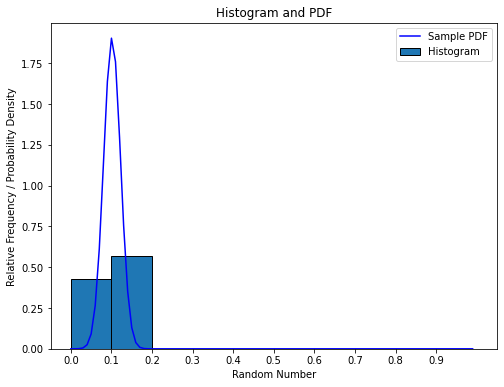

[79.89999999999999, 79.65, 80.32, 79.47999999999999, 79.69000000000001]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.2, 0.12, 0.08, 0.1, 0.14, 0.08, 0.1, 0.06, 0.14, 0.08, 0.06, 0.08, 0.14, 0.12, 0.04, 0.06, 0.06, 0.08, 0.06, 0.12, 0.12, 0.08, 0.16, 0.04, 0.22, 0.16, 0.12, 0.12, 0.12, 0.12, 0.08, 0.12, 0.06, 0.06, 0.08, 0.08, 0.1, 0.08, 0.14, 0.2, 0.06, 0.14, 0.1, 0.1, 0.08, 0.06, 0.12, 0.1, 0.1, 0.08, 0.12, 0.14, 0.14, 0.14, 0.14, 0.06, 0.1, 0.14, 0.08, 0.12, 0.06, 0.14, 0.12, 0.12, 0.16, 0.18, 0.1, 0.1, 0.04, 0.14, 0.14, 0.08, 0.12, 0.08, 0.1, 0.12, 0.08, 0.16, 0.12, 0.06, 0.14, 0.16, 0.08, 0.12, 0.14, 0.08, 0.2, 0.14, 0.16, 0.24, 0.08, 0.08, 0.08, 0.2, 0.16, 0.14, 0.08, 0.06, 0.06, 0.08, 0.1, 0.06, 0.04, 0.08, 0.1, 0.06, 0.04, 0.14, 0.14, 0.14, 0.08, 0.1, 0.1, 0.08, 0.

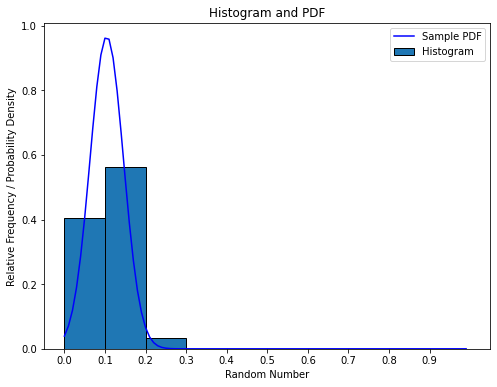

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.07, 0.13, 0.08, 0.03, 0.1, 0.12, 0.09, 0.1, 0.16, 0.06, 0.06, 0.07, 0.08, 0.1, 0.09, 0.08, 0.08, 0.08, 0.05, 0.06, 0.06, 0.08, 0.1, 0.07, 0.07, 0.09, 0.16, 0.11, 0.11, 0.13, 0.07, 0.07, 0.12, 0.1, 0.05, 0.07, 0.12, 0.17, 0.14, 0.14, 0.09, 0.05, 0.1, 0.16, 0.05, 0.11, 0.12, 0.07, 0.12, 0.14, 0.07, 0.12, 0.08, 0.07, 0.07, 0.16, 0.1, 0.12, 0.07, 0.14, 0.11, 0.11, 0.12, 0.08, 0.14, 0.14, 0.12, 0.1, 0.14, 0.09, 0.08, 0.11, 0.14, 0.13, 0.11, 0.09, 0.11, 0.07, 0.08, 0.09, 0.1, 0.08, 0.08, 0.2, 0.16, 0.07, 0.11, 0.1, 0.07, 0.08, 0.03, 0.09, 0.1, 0.15, 0.08, 0.1, 0.05, 0.06, 0.09, 0.1, 0.04, 0.05, 0.08, 0.13, 0.17, 0.08, 0.07, 0.1, 0.11, 0.08, 0.13, 0.08, 0.06, 0.05, 0.09, 0.11, 0.07, 0.08, 0.12, 0.13, 0.08, 0.07, 0.11, 0.08, 0.19, 0.1

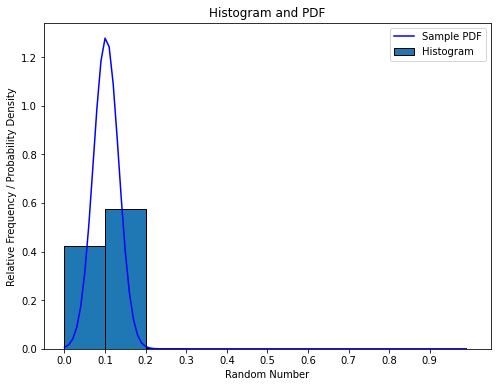

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.095, 0.09, 0.12, 0.085, 0.075, 0.135, 0.105, 0.08, 0.13, 0.09, 0.085, 0.095, 0.085, 0.065, 0.135, 0.09, 0.095, 0.085, 0.14, 0.095, 0.16, 0.11, 0.115, 0.095, 0.085, 0.085, 0.12, 0.09, 0.105, 0.105, 0.085, 0.125, 0.09, 0.12, 0.1, 0.1, 0.095, 0.105, 0.09, 0.1, 0.155, 0.14, 0.115, 0.13, 0.105, 0.07, 0.11, 0.07, 0.135, 0.115, 0.155, 0.13, 0.12, 0.095, 0.095, 0.105, 0.085, 0.075, 0.135, 0.075, 0.12, 0.095, 0.105, 0.07, 0.1, 0.08, 0.145, 0.085, 0.115, 0.095, 0.115, 0.055, 0.09, 0.09, 0.115, 0.105, 0.08, 0.1, 0.13, 0.085, 0.1, 0.145, 0.09, 0.065, 0.085, 0.075, 0.1, 0.105, 0.075, 0.095, 0.095, 0.135, 0.12, 0.08, 0.075, 0.15, 0.09, 0.07, 0.12, 0.095, 0.125, 0.125, 0.135, 0.095, 0.07, 0.11, 0.125, 0.115, 0.09, 0.095, 0.095, 0.07, 0.135, 

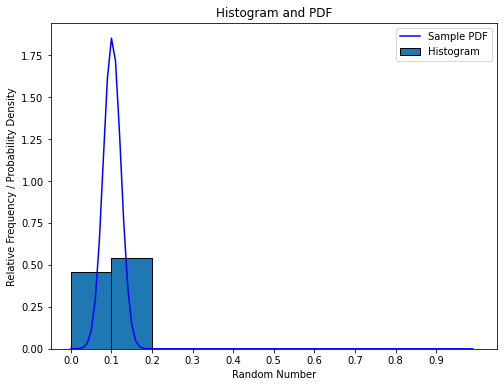

[79.89999999999999, 79.65, 80.32, 79.47999999999999, 79.69000000000001, 79.71199999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.08, 0.12, 0.06, 0.12, 0.06, 0.04, 0.16, 0.04, 0.12, 0.14, 0.06, 0.02, 0.12, 0.12, 0.06, 0.18, 0.08, 0.14, 0.12, 0.12, 0.1, 0.14, 0.08, 0.2, 0.1, 0.1, 0.1, 0.12, 0.08, 0.12, 0.14, 0.14, 0.14, 0.04, 0.12, 0.12, 0.12, 0.06, 0.12, 0.14, 0.08, 0.16, 0.14, 0.06, 0.06, 0.08, 0.1, 0.2, 0.22, 0.06, 0.18, 0.16, 0.16, 0.12, 0.08, 0.14, 0.1, 0.08, 0.04, 0.08, 0.18, 0.04, 0.14, 0.12, 0.08, 0.16, 0.1, 0.18, 0.08, 0.14, 0.12, 0.16, 0.08, 0.06, 0.08, 0.04, 0.04, 0.06, 0.14, 0.06, 0.14, 0.1, 0.08, 0.06, 0.1, 0.12, 0.1, 0.06, 0.1, 0.1, 0.14, 0.24, 0.12, 0.08, 0.1, 0.04, 0.06, 0.1, 0.12, 0.08, 0.08, 0.08, 0.08, 0.18, 0.14, 0.12, 0.06, 0.08, 0.12, 0.14, 0.1

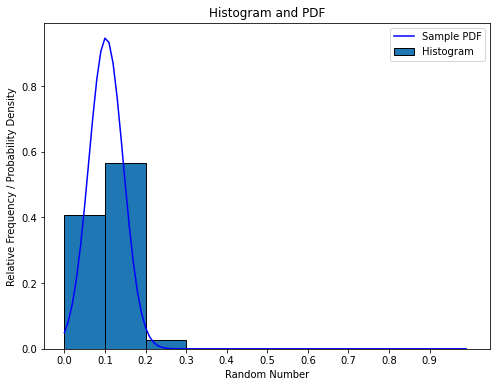

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.09, 0.11, 0.12, 0.1, 0.11, 0.15, 0.13, 0.1, 0.08, 0.09, 0.11, 0.1, 0.08, 0.12, 0.1, 0.07, 0.12, 0.11, 0.15, 0.05, 0.1, 0.06, 0.08, 0.15, 0.14, 0.07, 0.11, 0.1, 0.1, 0.09, 0.08, 0.09, 0.11, 0.15, 0.08, 0.11, 0.13, 0.08, 0.05, 0.08, 0.14, 0.08, 0.12, 0.05, 0.06, 0.15, 0.08, 0.14, 0.1, 0.11, 0.07, 0.14, 0.12, 0.08, 0.1, 0.16, 0.06, 0.09, 0.1, 0.1, 0.09, 0.13, 0.15, 0.14, 0.11, 0.11, 0.11, 0.12, 0.1, 0.05, 0.12, 0.09, 0.1, 0.09, 0.12, 0.06, 0.07, 0.08, 0.07, 0.07, 0.09, 0.09, 0.09, 0.11, 0.11, 0.12, 0.11, 0.12, 0.12, 0.15, 0.13, 0.09, 0.14, 0.09, 0.07, 0.15, 0.15, 0.09, 0.13, 0.1, 0.11, 0.1, 0.07, 0.11, 0.12, 0.08, 0.1, 0.2, 0.07, 0.07, 0.1, 0.19, 0.09, 0.06, 0.1, 0.12, 0.07, 0.04, 0.07, 0.15, 0.07, 0.12, 0.09, 0.1, 0.11, 0.16, 0

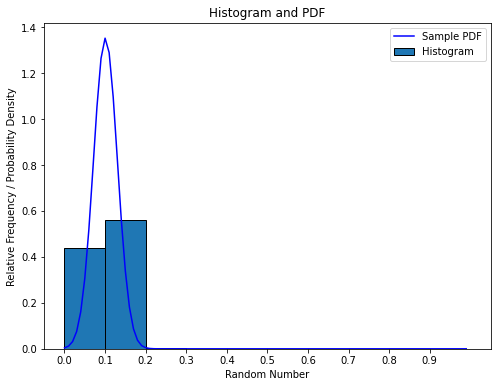

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.105, 0.135, 0.07, 0.11, 0.125, 0.11, 0.06, 0.105, 0.11, 0.14, 0.085, 0.08, 0.095, 0.075, 0.095, 0.1, 0.115, 0.045, 0.09, 0.095, 0.12, 0.1, 0.125, 0.1, 0.1, 0.07, 0.12, 0.085, 0.1, 0.1, 0.085, 0.085, 0.14, 0.14, 0.12, 0.09, 0.09, 0.115, 0.105, 0.105, 0.065, 0.105, 0.08, 0.1, 0.105, 0.07, 0.125, 0.07, 0.08, 0.105, 0.13, 0.09, 0.08, 0.105, 0.105, 0.115, 0.105, 0.105, 0.115, 0.095, 0.1, 0.125, 0.12, 0.115, 0.15, 0.11, 0.145, 0.08, 0.125, 0.09, 0.11, 0.12, 0.135, 0.08, 0.055, 0.12, 0.095, 0.07, 0.115, 0.095, 0.115, 0.14, 0.095, 0.1, 0.13, 0.11, 0.105, 0.17, 0.135, 0.09, 0.125, 0.105, 0.105, 0.08, 0.105, 0.1, 0.085, 0.1, 0.065, 0.04, 0.09, 0.13, 0.095, 0.08, 0.11, 0.08, 0.125, 0.115, 0.12, 0.105, 0.105, 0.11, 0.07, 0.125, 0.11, 0.0

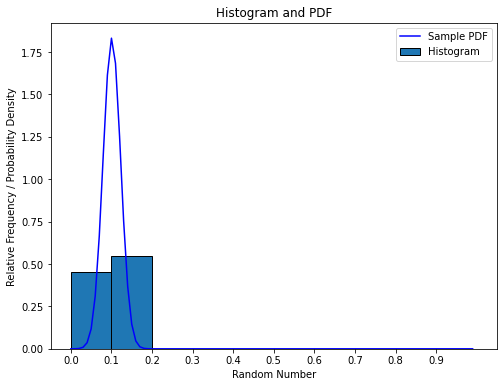

[79.89999999999999, 79.65, 80.32, 79.47999999999999, 79.69000000000001, 79.71199999999999, 79.79900000000004]


In [9]:

p = 0.1
rf1 = 1

stages = [50, 100, 200]
n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    for stage in stages:
        random_frequencies = []

        for _ in range(n):
            # Generate random numbers 
            random_freq = random_frequency(stage,p)
            random_frequencies.append(random_freq)

            mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, random_frequencies)
        
        print(f"STAGE n = {stage}")
        aggregate()

        left_boundary = 0  # Minimum boundary of the range
        right_boundary = 1 # Maximum boundary of the range
        num_plots = 10  # Number of intervals (bins)

        frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)

        draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
        

    relative_err_mean_list.append(relative_err)
    print(relative_err_mean_list)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)


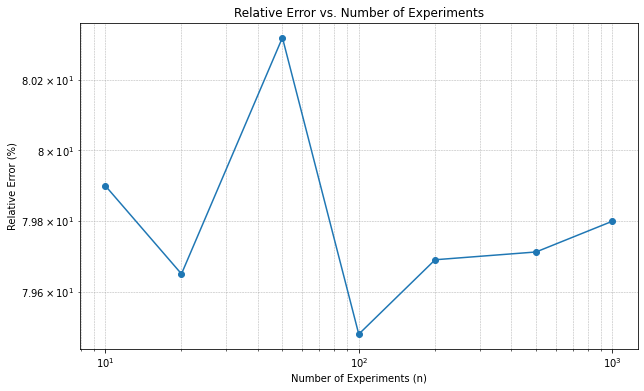

In [10]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

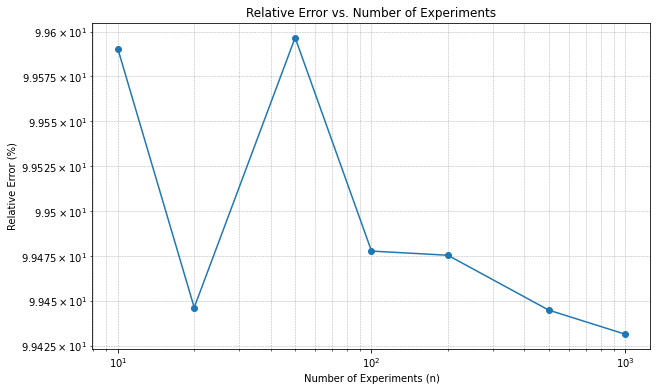

In [11]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

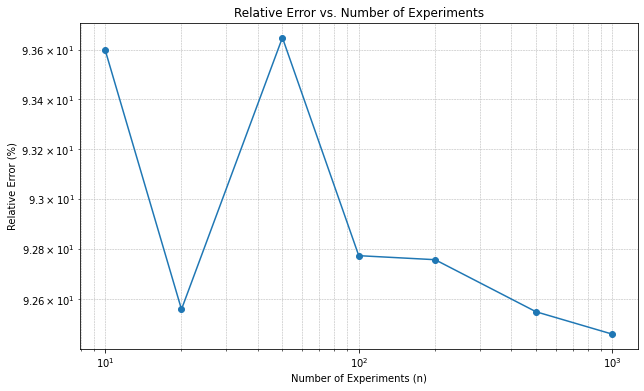

In [12]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [13]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
